## Natural Language Processing
TensorFlow zero to hero: https://www.youtube.com/watch?v=fNxaJsNG3-s&list=PLQY2H8rRoyvzDbLUZkbudP-MFQZwNmU4S
### Tokenization
Representing words in a way a computer can process them, so later a neural network can understand their meaning.

Tokenization uses an encoding scheme to represent letters. However silent and listen have the same letters just a different order. 

We can instead encode words to show similarity between sentences.

In [1]:
# import tokenizer API
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
# represent sentences as array of strings
sentences = [
    'I love my dog',
    'I love my cat',
    'You love my dog!'
]
# create an instance onf tokenizer object
tokenizer = Tokenizer(num_words = 100) # num_words is max number of words to keep
tokenizer.fit_on_texts(sentences)
word_index  = tokenizer.word_index
print(word_index)

{'love': 1, 'my': 2, 'i': 3, 'dog': 4, 'cat': 5, 'you': 6}


After adding the third sentence where 'dog' is followed by'!', tokenizer is smart enought to catch some exceptions. It doesn't create a new token for 'dog!'. It recognizes an already existing token. Also creates a new token for the word 'you'.

Now that words are recognized by a computer, we need to represent sentences as sequences of numbers _in the correct order_.

### Sentences to Data
Tokenizer has turned words into numeric tokens, build on this 

In [2]:
sentences = [
    'I love my dog',
    'I love my cat',
    'You love my dog!',
    'Do you think my dog is amazing?'
]

tokenizer = Tokenizer(num_words = 100) # num_words is max number of words to keep
tokenizer.fit_on_texts(sentences)
word_index  = tokenizer.word_index

# create sequence of tokens representing each sentence
sequences = tokenizer.texts_to_sequences(sentences)


print(word_index)
print(sequences)

{'my': 1, 'love': 2, 'dog': 3, 'i': 4, 'you': 5, 'cat': 6, 'do': 7, 'think': 8, 'is': 9, 'amazing': 10}
[[4, 2, 1, 3], [4, 2, 1, 6], [5, 2, 1, 3], [7, 5, 8, 1, 3, 9, 10]]


Returns dictionary as before with a few new words/tokens. Also returns an array of arrays containing the tokenizer sequence.

Good for getting data ready for training data for a neural network. What if the nn receives words it has never seen before?

Re-looking at code:
- Have a set of sentences used for training a neural network
- Tokenizer gets word index from these and creates sequences for us

So now if we have words that aren't present in the word index, because they weren't present in the intial dataset.

In [3]:
test_data = [
    'I really love my dog',
    'My dog loves my manatee'
]

test_seq = tokenizer.texts_to_sequences(test_data)
print(test_seq)


[[4, 2, 1, 3], [1, 3, 1]]


We return arrays shorter than the input words as we are missing tokens from our word index. Missing: 'really', 'loves' and 'manatee'.

In order not to lose the length of the sequence, use the <font color=green>'OOV'</font> token property and set it to something you would not expect to see in the corpus. Tokenizer will replace words it does not recognize with this so we maintain sequence length.

_(OOV stands for 'Out Of Vocabulary' Token)_

Imagine using it as an arbitrary placeholder used for any word it doesn't recognize.

In [4]:
tokenizer = Tokenizer(num_words = 100, oov_token='<OOV>') # oov_token kwarg is where we set our placeholder
tokenizer.fit_on_texts(sentences)
word_index  = tokenizer.word_index

# create sequence of tokens representing each sentence
sequences = tokenizer.texts_to_sequences(sentences)

test_seq = tokenizer.texts_to_sequences(test_data)

print(test_seq)

[[5, 1, 3, 2, 4], [2, 4, 1, 2, 1]]


We have still lost some meaning but at least our sentences are now the correct length. Here our OOV token is the number 1.

How do we handle sentences of different length? (Image recognition usually uses images all of the same size)

We can use a <font color=blue>Ragged Tensor</font> (advanced), here we will use <font color=blue>Padding</font>. We import pad_sequences form TF.

In [5]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

sentences = [
    'I love my dog',
    'I love my cat',
    'You love my dog!',
    'Do you think my dog is amazing?'
]


tokenizer = Tokenizer(num_words = 100, oov_token='<OOV>') # oov_token kwarg is where we set our placeholder
tokenizer.fit_on_texts(sentences)
word_index  = tokenizer.word_index

# create sequence of tokens representing each sentence
sequences = tokenizer.texts_to_sequences(sentences)

test_seq = tokenizer.texts_to_sequences(test_data)
# simply pass sequences to pad_sequences
padded = pad_sequences(sequences)

print(word_index)
print(sequences)
print(padded)

{'<OOV>': 1, 'my': 2, 'love': 3, 'dog': 4, 'i': 5, 'you': 6, 'cat': 7, 'do': 8, 'think': 9, 'is': 10, 'amazing': 11}
[[5, 3, 2, 4], [5, 3, 2, 7], [6, 3, 2, 4], [8, 6, 9, 2, 4, 10, 11]]
[[ 0  0  0  5  3  2  4]
 [ 0  0  0  5  3  2  7]
 [ 0  0  0  6  3  2  4]
 [ 8  6  9  2  4 10 11]]


Padding precedes any sequence with sufficient 0's to that of the longest sequence length. Resulting in all sequences being of same length. 

Can pass _padding='post'_ into <font color=green>pad_sequences</font> kwarg's to place 0's succeding sequences. 

If don't want length of padded sentences to be length of longest sentence, _pass maxlen=' '_ to specify desired sequence length. 

If sentence longer than maxlen, can spass _truncate='post'_ to chop at end of sentence. 

Now we have Tokenized and Organized, we can take data and train a neural network with text data. Look at a dataset with sentences to classify if they are sarcastic or not.

### Recognizing Sentiment
Using a dataset of headlines where headline has been classified as saracastic or not.

__Datset Context__:
 - __is_saracastic__: 1 if the record is sarcastic, otherwise 0 
 - __headline__: the headline of the news and article
 
The data is in JSON format so we'll need to convert it to python format.

In [6]:
import pandas as pd
data = pd.read_json('..\Documents\GitHub\Sarcasm_Headlines_Dataset_V2.json', lines=True)

data.head(3)

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...


In [7]:
import json

def parse_data(file):
    for l in open(file,'r'):
        yield json.loads(l)
#parsing json data into lists
data = list(parse_data('..\Documents\GitHub\Sarcasm_Headlines_Dataset.json'))
#create new arrays for use in NLP
sentences = []
labels = []
urls = []
for item in data:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])
    urls.append(item['article_link'])

Now we have our lists, we can now go through our natural language preprocessing again.

In [8]:
#from tensorflow.keras.preprocessing.text import Tokenizer
#from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(oov_token='<OOV>')
tokenizer.fit_on_texts(sentences) #create token for every word in corpus
word_index  = tokenizer.word_index #see tokens in the word index

sequences = tokenizer.texts_to_sequences(sentences)
padded = pad_sequences(sequences,maxlen=40,padding='post')

#inspecting
print(padded[0])
print(padded.shape)
print(len(sequences))
print(len(word_index))

[  308 15115   679  3337  2298    48   382  2576 15116     6  2577  8434
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0]
(26709, 40)
26709
29657


First array is an example of a sequence, note the truncated zeros are succeding the tokens that are present.

Second array shows shape of padded array, that is 26709 sequences each with 40 tokens (most of the tokens are zero due to truncating).

Last two inspections just to check we have more words than sequences of words.

### Splitting the Data
We currently don't have a training:test data split, we will split them using a slice. Here we use our training size as 20,000.

In [9]:
training_size = 20000

#slice data
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

### Tokenizing
We have used a tokenizer to create a token for every word in the corpus. we will use this tokenizer again.

We also need to make sure the neural net only sees the training and never sees the test data. To do this we create a padded training set and a padded testing set.

In [10]:
#instantiate a tokenizer
vocab_size = 29657
tokenizer = Tokenizer(num_words=vocab_size,oov_token='<OOV>')
#fit tokenizer on just training sentences
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

#create a set of training sequences
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences,maxlen=40)

#create a set of test sequences
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=40)

<font color=red>NOTE!</font> Length of test and training must have the same shape when in the model, hence maxlen arg set to the same value.

Cell below is so code works with TensorFlow 2.x

In [11]:
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

Cell below is where I investigated and figured out my training and test shapes were different. This would be due to the split where the maxlen of a sequence in the test split was 38, whereas the maxlen in train split was 40.

In [12]:
print(testing_padded.shape)
print(training_padded.shape)

(6709, 40)
(20000, 40)


### Semantic to Syntactic
Turned sentences to numbers, with numbers being tokens representing words. How do we get meaning? How to determine if sarcastic just from these numbers?

Consider basic sentiment: good and bad. Can plot both of these as opposites. Can then determine good or bad sentiment as coordinates in the x and y. E.g: Good [1,0] Bad [-1,0]

By looking at the direction of the vector we can start to determine the meaning of the word.

If we extend into multiples dimensions, plot sarcastic and not sarcastic. As we train we can see how vectors of the sentences point in certain directions. This is called embedding, by summing vectors of different sentiments we can find where they lie in thes multidimensional plots.

Coding this. First declare global variables:

In [13]:
vocab_size = 29657
embedding_dim = 16
max_length = 40
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000

Build the neural network as a sequential model using tensorflow keras layers.

In [14]:
model = tf.keras.Sequential([
    #first layer is embedding, direction of each word learned on epoch
    tf.keras.layers.Embedding(vocab_size, embedding_dim,input_length=max_length),
    tf.keras.Input(shape=(16,)),
    #pool by global average (add up vectors)
    tf.keras.layers.GlobalAveragePooling1D(keepdims=False),
    #fed into common deep nn
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

The idea of this network is to take the already given: sarcastic/not sarcastic metric. And use that to define the sentiment for the individual words that make up the sentence. We keep doing this and the vectors for each word in the corpus keep changing until they converge on a stable point or our epoch's end.

Checking our model is as required:

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 40, 16)            474512    
                                                                 
 input_1 (InputLayer)        multiple                  0         
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 24)                408       
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 474,945
Trainable params: 474,945
Non-trainable params: 0
__________________________________________________

Running the model:

In [16]:
num_epochs = 15
history = model.fit(training_padded, 
          training_labels,
          batch_size=None,#will default to int 32 otherwise
          epochs=num_epochs, 
          validation_data=(testing_padded, testing_labels)
          )

Epoch 1/15
625/625 [==============================] - 11s 14ms/step - loss: 0.6178 - accuracy: 0.6629 - val_loss: 0.4680 - val_accuracy: 0.8264
Epoch 2/15
625/625 [==============================] - 8s 13ms/step - loss: 0.3528 - accuracy: 0.8641 - val_loss: 0.3602 - val_accuracy: 0.8422
Epoch 3/15
625/625 [==============================] - 8s 13ms/step - loss: 0.2452 - accuracy: 0.9069 - val_loss: 0.3329 - val_accuracy: 0.8571
Epoch 4/15
625/625 [==============================] - 8s 13ms/step - loss: 0.1808 - accuracy: 0.9355 - val_loss: 0.3342 - val_accuracy: 0.8606
Epoch 5/15
625/625 [==============================] - 8s 14ms/step - loss: 0.1351 - accuracy: 0.9544 - val_loss: 0.3507 - val_accuracy: 0.8574
Epoch 6/15
625/625 [==============================] - 8s 13ms/step - loss: 0.1013 - accuracy: 0.9686 - val_loss: 0.3778 - val_accuracy: 0.8530
Epoch 7/15
625/625 [==============================] - 8s 13ms/step - loss: 0.0759 - accuracy: 0.9782 - val_loss: 0.4022 - val_accuracy: 0.853

First accuracy is accuracy fitting sentiment to training data which (after 30 epochs) is understandably at 100%. Second accuracy is the one we care about; predictions on the test data (sequences it hasn't seen before). This reached 81%.

Now we have generated a corpus with embedded words, we can use our vector semantics to predict the overall semantic of a new sentence. 
### Establish Sentiment in New Sentences

Using two new sentences to test our tokenizer:

In [17]:
sentence_new = [
    'granny starting to fear spiders in the garden might be real',
    'the weather today is bright and sunny'
]

sequences_new = tokenizer.texts_to_sequences(sentence_new)

padded_new = pad_sequences(sequences_new, maxlen=40,
                       padding='post',
                      )

print(model.predict(padded_new))

1/1 [==============================] - 0s 275ms/step
[[7.446103e-01]
 [6.094066e-04]]


First shows a value of 0.91 which is very close to 1, indicating a high probability of sarcasm. Second shows a value of 0.0000038 indicating a very low probability of sarcasm.

#### Visualising

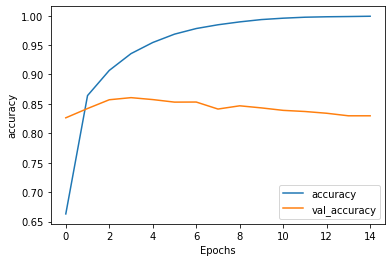

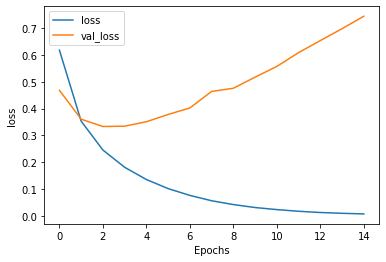

In [18]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

### Summary
- __Tokenization__: Encoding words (instead of letters) to be represented as numbers. Allows computer to understand the input.
- __Sequencing__: Returns sentence as a sequence of the tokens representing those words.
- __Out Of Vocabulary Token__: 'OOV' token replaces words it doesn't expect to see with the designated OOV token into the corpus.
- __Padding__: Precedes/Succedes any sequence with sufficient 0's to match that of the longest sequence in the corpus. Results in all inputs being of the same length

__Semantic Analysis__
- __Embedding__: Generate embeddings for our corpus. Done through a sequential Neural Network.
- __Establish New Sentiment__: Use our corpus to predict sentiment of a new sentence.